In [1]:
!pip install mapclassify

In [2]:
indiaMapsLink = 'https://github.com/FabioGM-02/Tarea-5/raw/refs/heads/main/Maps/indiaMaps_7755.gpkg'

import geopandas as gpd

gpd.list_layers(indiaMapsLink)

,name,geometry_type
0,country,MultiPolygon
1,cities,Point
2,rivers,MultiLineString
3,centroid,Point
4,airports,Point
5,states,MultiPolygon


In [3]:
airports=gpd.read_file(indiaMapsLink,layer='airports')
rivers=gpd.read_file(indiaMapsLink,layer='rivers')
cities=gpd.read_file(indiaMapsLink,layer='cities')

In [4]:
import pandas as pd

portsFileLink="https://github.com/CienciaDeDatosEspacial/GeoDataFrame_Analytics/raw/main/data/UpdatedPub150.csv"
infoseaports=pd.read_csv(portsFileLink)

# columns available (so many)
infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Manage

In [5]:
# renamming
infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)
# keeping few columns
infoseaports=infoseaports.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]

# we have now
infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3739 non-null   object 
 1   Country Code  3739 non-null   object 
 2   Latitude      3739 non-null   float64
 3   Longitude     3739 non-null   float64
dtypes: float64(2), object(2)
memory usage: 117.0+ KB


In [6]:
# spatial points
seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                           geometry=gpd.points_from_xy(infoseaports.Longitude,
                                                       infoseaports.Latitude),
                          crs=4326)# notice it is unprojected

# keeping India
seaports_ind=seaports[seaports['Country Code']=='India'].copy()

# reset indexes
seaports_ind.reset_index(drop=True, inplace=True)

# reprojecting
seaports_ind_7755=seaports_ind.to_crs(7755)

<Axes: >

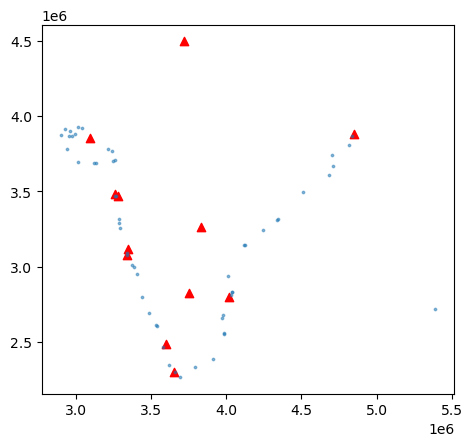

In [7]:
# subsetting
largeAirports=airports[airports['kind']=='large_airport']
largeAirports.reset_index(drop=True, inplace=True)

# plotting
base=largeAirports.plot(color='red',marker="^")
seaports_ind_7755.plot(ax=base,alpha=0.5,markersize=3)

Exercise 1

In [9]:
distanceMatrixKM_sea_air= seaports_ind_7755.set_index('portName').geometry.apply\
                          (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
                          sort_index(axis=0).sort_index(axis=1)

In [10]:
# getting the geometry of the points
selected_seaport_geom = seaports_ind_7755[seaports_ind_7755['portName'] == distanceMatrixKM_sea_air.iloc[0].name].geometry
selected_airport_geom = largeAirports[largeAirports['name'] == distanceMatrixKM_sea_air.iloc[0].idxmin(axis=0)].geometry

# loading India's boundary for plotting
india_boundary = gpd.read_file(indiaMapsLink, layer='country')

In [11]:
base=india_boundary.explore(facecolor='none', edgecolor='none')
selected_airport_geom.explore(m=base,color='red',marker_kwds=dict(radius=10))
selected_seaport_geom.explore(m=base,color='blue',marker_kwds=dict(radius=5))

Exercise 2

In [13]:
rivers.head()

,NAME,SYSTEM,geometry
0,Ganges,None,"MULTILINESTRING ((4002830.005 4746881.883, 399..."
1,Brahmaputra,None,"MULTILINESTRING ((5449883.491 4633709.06, 5433..."
2,Indus,None,"MULTILINESTRING ((2827133.854 4025152.519, 282..."


In [14]:
#keep one:

rivers[rivers.NAME.str.contains('Ganges')]

,NAME,SYSTEM,geometry
0,Ganges,None,"MULTILINESTRING ((4002830.005 4746881.883, 399..."


In [15]:
# distance from each airport to the Ganges
rivers[rivers.NAME.str.contains('Ganges')].geometry[0].distance(largeAirports.set_index('name').geometry)/1000

name
Navi Mumbai International Airport                    1110.302110
Chhatrapati Shivaji International Airport            1116.358925
Rajkot International Airport                          982.853397
Netaji Subhash Chandra Bose International Airport     248.922105
Indira Gandhi International Airport                   124.409006
Kempegowda International Airport                     1402.228051
Cochin International Airport                         1768.506275
Manohar International Airport                        1343.861047
Dabolim Airport                                      1379.829539
Rajiv Gandhi International Airport                    962.045552
Chennai International Airport                        1358.186403
Thiruvananthapuram International Airport             1928.517657
Name: geometry, dtype: float64

In [16]:
distanceMatrixKM_riv_air=rivers.set_index('NAME').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)
distanceMatrixKM_riv_air

name,Chennai International Airport,Chhatrapati Shivaji International Airport,Cochin International Airport,Dabolim Airport,Indira Gandhi International Airport,Kempegowda International Airport,Manohar International Airport,Navi Mumbai International Airport,Netaji Subhash Chandra Bose International Airport,Rajiv Gandhi International Airport,Rajkot International Airport,Thiruvananthapuram International Airport
NAME,,,,,,,,,,,,
Brahmaputra,1679.260655,1849.876526,2177.638950,1970.157566,1296.337648,1825.838178,1944.202519,1836.171775,322.627974,1461.625754,1909.737333,2295.457166
Ganges,1358.186403,1116.358925,1768.506275,1379.829539,124.409006,1402.228051,1343.861047,1110.302110,248.922105,962.045552,982.853397,1928.517657
Indus,1710.340311,693.402344,1721.646058,1081.191036,538.950716,1516.897046,1048.901990,715.508871,1435.454894,1262.835463,318.913617,1914.018893


In [17]:
distanceMatrixKM_riv_air.loc['Ganges'].sort_values()

name
Indira Gandhi International Airport                   124.409006
Netaji Subhash Chandra Bose International Airport     248.922105
Rajiv Gandhi International Airport                    962.045552
Rajkot International Airport                          982.853397
Navi Mumbai International Airport                    1110.302110
Chhatrapati Shivaji International Airport            1116.358925
Manohar International Airport                        1343.861047
Chennai International Airport                        1358.186403
Dabolim Airport                                      1379.829539
Kempegowda International Airport                     1402.228051
Cochin International Airport                         1768.506275
Thiruvananthapuram International Airport             1928.517657
Name: Ganges, dtype: float64

In [18]:
base=largeAirports.explore(color='red',marker_kwds=dict(radius=10))
rivers[rivers.NAME.str.contains('Ganges')].explore(m=base)

In [19]:
rivers[~rivers.SYSTEM.isna()]

,NAME,SYSTEM,geometry


In [20]:
rivers.drop(columns='SYSTEM',inplace=True)

In [21]:
rivers

,NAME,geometry
0,Ganges,"MULTILINESTRING ((4002830.005 4746881.883, 399..."
1,Brahmaputra,"MULTILINESTRING ((5449883.491 4633709.06, 5433..."
2,Indus,"MULTILINESTRING ((2827133.854 4025152.519, 282..."


In [22]:
distanceMatrixKM_sys_air=rivers.set_index('NAME').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sys_air

name,Chennai International Airport,Chhatrapati Shivaji International Airport,Cochin International Airport,Dabolim Airport,Indira Gandhi International Airport,Kempegowda International Airport,Manohar International Airport,Navi Mumbai International Airport,Netaji Subhash Chandra Bose International Airport,Rajiv Gandhi International Airport,Rajkot International Airport,Thiruvananthapuram International Airport
NAME,,,,,,,,,,,,
Brahmaputra,1679.260655,1849.876526,2177.638950,1970.157566,1296.337648,1825.838178,1944.202519,1836.171775,322.627974,1461.625754,1909.737333,2295.457166
Ganges,1358.186403,1116.358925,1768.506275,1379.829539,124.409006,1402.228051,1343.861047,1110.302110,248.922105,962.045552,982.853397,1928.517657
Indus,1710.340311,693.402344,1721.646058,1081.191036,538.950716,1516.897046,1048.901990,715.508871,1435.454894,1262.835463,318.913617,1914.018893


In [23]:
min_river_geom = largeAirports[largeAirports['name'] == distanceMatrixKM_sys_air.iloc[1].idxmin(axis=0)].geometry
max_river_geom = largeAirports[largeAirports['name'] == distanceMatrixKM_sys_air.iloc[1].idxmax(axis=0)].geometry

In [25]:
base=rivers.explore()
# the closest
min_river_geom.explore(m=base,color='red',marker_kwds=dict(radius=10))
# the farthest
max_river_geom.explore(m=base,color='blue',marker_kwds=dict(radius=5))

Exercise 3

In [27]:
rivers['SYSTEM'] = 'Himalayas'
rivers

,NAME,geometry,SYSTEM
0,Ganges,"MULTILINESTRING ((4002830.005 4746881.883, 399...",Himalayas
1,Brahmaputra,"MULTILINESTRING ((5449883.491 4633709.06, 5433...",Himalayas
2,Indus,"MULTILINESTRING ((2827133.854 4025152.519, 282...",Himalayas


In [28]:
systems=rivers.dissolve(by='SYSTEM')
systems

,geometry,NAME
SYSTEM,,
Himalayas,"MULTILINESTRING ((4002830.005 4746881.883, 399...",Ganges


In [29]:
# format the GDF:

systems.reset_index(drop=False,inplace=True)
systems.drop(columns='NAME',inplace=True)

# we have
systems

,SYSTEM,geometry
0,Himalayas,"MULTILINESTRING ((4002830.005 4746881.883, 399..."


In [30]:
# polygon for each system
systems.convex_hull

0    POLYGON ((2827133.854 4025152.519, 2827023.807...
dtype: geometry

<Axes: >

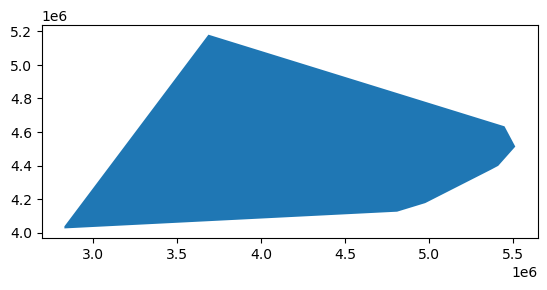

In [31]:
# see them
systems.convex_hull.plot()

In [32]:
systems_hulls=systems.convex_hull.to_frame()
systems_hulls['system']=['Himalayas']
systems_hulls.rename(columns={0:'geometry'},inplace=True)
systems_hulls=systems_hulls.set_geometry('geometry')
systems_hulls.crs="EPSG:7755"
systems_hulls

,geometry,system
0,"POLYGON ((2827133.854 4025152.519, 2827023.807...",Himalayas


In [33]:
distanceMatrixKM_sysHull_air=systems_hulls.set_index('system').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sysHull_air

name,Chennai International Airport,Chhatrapati Shivaji International Airport,Cochin International Airport,Dabolim Airport,Indira Gandhi International Airport,Kempegowda International Airport,Manohar International Airport,Navi Mumbai International Airport,Netaji Subhash Chandra Bose International Airport,Rajiv Gandhi International Airport,Rajkot International Airport,Thiruvananthapuram International Airport
system,,,,,,,,,,,,
Himalayas,1285.620505,561.475367,1574.321836,974.589045,0.0,1247.307032,935.201668,574.804244,248.922105,810.396252,185.707777,1764.9268


In [34]:
mins=distanceMatrixKM_sysHull_air.idxmin(axis="columns")
mins

system
Himalayas    Indira Gandhi International Airport
dtype: object

In [35]:
# plotting
base=systems_hulls.explore()
largeAirports[largeAirports.name.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10))
largeAirports[~largeAirports.name.isin(mins)].explore(m=base,color='blue',marker_kwds=dict(radius=5))

Exercise 4

In [37]:
# remember:
distanceMatrixKM_riv_air

name,Chennai International Airport,Chhatrapati Shivaji International Airport,Cochin International Airport,Dabolim Airport,Indira Gandhi International Airport,Kempegowda International Airport,Manohar International Airport,Navi Mumbai International Airport,Netaji Subhash Chandra Bose International Airport,Rajiv Gandhi International Airport,Rajkot International Airport,Thiruvananthapuram International Airport
NAME,,,,,,,,,,,,
Brahmaputra,1679.260655,1849.876526,2177.638950,1970.157566,1296.337648,1825.838178,1944.202519,1836.171775,322.627974,1461.625754,1909.737333,2295.457166
Ganges,1358.186403,1116.358925,1768.506275,1379.829539,124.409006,1402.228051,1343.861047,1110.302110,248.922105,962.045552,982.853397,1928.517657
Indus,1710.340311,693.402344,1721.646058,1081.191036,538.950716,1516.897046,1048.901990,715.508871,1435.454894,1262.835463,318.913617,1914.018893


In [38]:
# getting a value (it can be any value)
distanceMatrixKM_riv_air.loc['Ganges'].min() # I chose min

124.40900596441938

In [39]:
minMts=distanceMatrixKM_riv_air.loc['Ganges'].min()*1000 # km

#the buffer is a polygon:
rivers[rivers.NAME=='Ganges'].buffer(distance = minMts)

0    POLYGON ((3734674.566 4693601.492, 3736334.4 4...
dtype: geometry

In [40]:
# see buffer:
bufferAroundGanges=rivers[rivers.NAME=='Ganges'].buffer(distance = minMts)
bufferAsBase=bufferAroundGanges.explore(color='red')
rivers[rivers.NAME=='Ganges'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})

In [41]:
small_airports=airports[airports['kind']=='small_airport']

# plotting
rivers[rivers.NAME=='Ganges'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
small_airports.explore(m=bufferAsBase,color='black')

In [42]:
riversWithinBuffer=small_airports.clip(mask=bufferAroundGanges)

In [43]:
# plotting the airports within buffer
bufferAsBase=bufferAroundGanges.explore(color='red')
rivers[rivers.NAME=='Ganges'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
riversWithinBuffer.explore(m=bufferAsBase,color='black')

In [44]:
# minimum of all the minimum by row
distanceMatrixKM_riv_air.min(axis=1).min()

124.40900596441938

In [45]:
# using the previous value
minMinMts_5=1*distanceMatrixKM_riv_air.min(axis=1).min()*1000

allMinBuffer=rivers.buffer(distance = minMinMts_5).explore(color='red')
rivers.explore(m=allMinBuffer,color='blue',style_kwds={'weight':0.5})

In [46]:
# you see all the buffer polygons:
riversAll_buf=rivers.buffer(distance=minMinMts_5)
riversAll_buf

0    POLYGON ((3734674.566 4693601.492, 3736334.4 4...
1    POLYGON ((5102081.831 4164041.712, 5099367.849...
2    MULTIPOLYGON (((3869222.791 4888710.348, 38657...
dtype: geometry

In [47]:
allRiversWithinBuffs=small_airports.clip(riversAll_buf)

<Axes: >

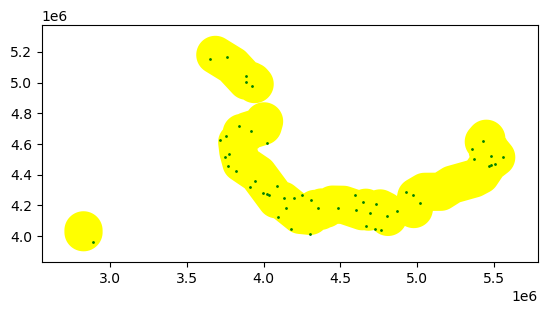

In [48]:
# simple
base=riversAll_buf.plot(color='yellow')
allRiversWithinBuffs.plot(ax=base, color='green', markersize=1)

In [49]:
# folium

base=riversAll_buf.explore(color='yellow')
allRiversWithinBuffs.explore(m=base, color='green')